# Purpose: To calrep a file and produce a comparision plot subtracting a results file or mean 

## Steps to complete

1. Open a raw file
2. create a mean frame from history
3. calrep raw file
4. subtract mean frame and calrep file
5. plot a shaded region for the error values and the difference

In [1]:
from pyMeasure import *
import os
import pandas

Importing Code.Utils.Names
Importing Code.DataHandlers.NISTModels
Importing Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
Importing Code.DataHandlers.RadiCALModels
Importing Code.DataHandlers.ZipModels
Importing Code.DataHandlers.Translations
Importing Code.DataHandlers.StatistiCALModels
Importing Code.DataHandlers.MUFModels
Importing Code.Analysis.SParameter
Importing Code.InstrumentControl.Instruments
Importing Code.InstrumentControl.Experiments


In [3]:
options={"data_begin_line":0,"data_end_line":-1,"data_delimiter":"[\s]+","column_names_delimiter":None}
res=ResultFileModel(r"V:\checkstd\resfiles\CTN208",**options)

In [4]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


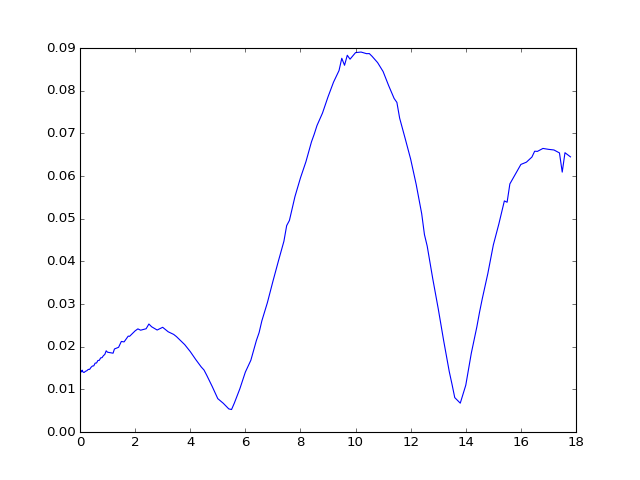

In [5]:
%matplotlib notebook
plt.plot(res["Frequency"],res["magS11"])

In [6]:
# redefined this way so I can run it other machines
SHARE_DIRECTORY=r"C:\Share"
RESULTS_ONE_PORT=os.path.join(SHARE_DIRECTORY,r"Combined_Results_Files\One_Port_Combined_Results_File.csv")
RESULTS_TWO_PORT=os.path.join(SHARE_DIRECTORY,r"Combined_Results_Files\Two_Port_Combined_Results_File.csv")
RESULTS_POWER=os.path.join(SHARE_DIRECTORY,r"Combined_Results_Files\Power_Combined_Results_File.csv")
TWO_PORT_NR_CHKSTD_CSV=os.path.join(SHARE_DIRECTORY,r"Converted_Check_Standard\Two_Port_NR_Check_Standard.csv")
COMBINED_ONE_PORT_CHKSTD_CSV=os.path.join(SHARE_DIRECTORY,r"Converted_Check_Standard\Combined_One_Port_Check_Standard.csv")
COMBINED_TWO_PORT_CHKSTD_CSV=os.path.join(SHARE_DIRECTORY,r"Converted_Check_Standard\Combined_Two_Port_Check_Standard.csv")
COMBINED_POWER_CHKSTD_CSV=os.path.join(SHARE_DIRECTORY,r"Converted_Check_Standard\Combined_Power_Check_Standard.csv")
ONE_PORT_CALREP_CSV=os.path.join(SHARE_DIRECTORY,r"Converted_DUT\One_Port_DUT.csv")
TWO_PORT_CALREP_CSV=os.path.join(SHARE_DIRECTORY,r"Converted_DUT\Two_Port_DUT.csv")
POWER_3TERM_CALREP_CSV=os.path.join(SHARE_DIRECTORY,r"Converted_DUT\Power_3Term_DUT.csv")
POWER_4TERM_CALREP_CSV=os.path.join(SHARE_DIRECTORY,r"Converted_DUT\Power_4Term_DUT.csv")
one_port_dtype={'Frequency':'float',
 'Direction':'str',
 'Connect':'str',
 'System_Id':'str',
 'System_Letter':'str',
 'Connector_Type_Calibration':'str',
 'Connector_Type_Measurement':'str',
 'Measurement_Type':'str',
 'Measurement_Date':'str',
 'Measurement_Time':'str',
 'Program_Used':'str',
 'Program_Revision':'str',
 'Operator':'str',
 'Calibration_Name':'str',
 'Calibration_Date':'str',
 'Port_Used':'int',
 'Number_Connects':'str',
 'Number_Repeats':'str',
 'Nbs':'str',
 'Number_Frequencies':'str',
 'Start_Frequency':'float',
 'Device_Description':'str',
 'Device_Id':'str',
 'Measurement_Timestamp':'str',
}
if COMBINE_S11_S22:
    one_port_dtype["arg"]='float'
    one_port_dtype["mag"]='float'
else:
    one_port_dtype["argS11"]='float'
    one_port_dtype["magS11"]='float'
    one_port_dtype["argS22"]='float'
    one_port_dtype["magS22"]='float'

# The big time and memory sink, there has to be a better way to do this
history_dict={'1-port':pandas.read_csv(COMBINED_ONE_PORT_CHKSTD_CSV,dtype=one_port_dtype),
         '2-port':pandas.read_csv(COMBINED_TWO_PORT_CHKSTD_CSV),
         '2-portNR':pandas.read_csv(TWO_PORT_NR_CHKSTD_CSV),'power':pandas.read_csv(COMBINED_POWER_CHKSTD_CSV),
         '1-port calrep':pandas.read_csv(ONE_PORT_CALREP_CSV),
         '2-port calrep':pandas.read_csv(TWO_PORT_CALREP_CSV),
         'power 3term calrep':pandas.read_csv(POWER_3TERM_CALREP_CSV),
         'power 4term calrep':pandas.read_csv(POWER_4TERM_CALREP_CSV),
         '1-port results':pandas.read_csv(RESULTS_ONE_PORT),
         '2-port results':pandas.read_csv(RESULTS_TWO_PORT),
         'power results':pandas.read_csv(RESULTS_POWER)}

def return_history_key(input_model):
    "Returns a key for the history dictionary given a calrep model"
    model=input_model.__class__.__name__
    print("{0} is {1}".format("model",model))
    if re.search('Calrep|DUT',model):
        if re.search('OnePortCalrep',model):
            return '1-port calrep'
        elif re.search('TwoPortCalrep',model):
            return '2-port calrep'
        elif re.search('PowerCalrep',model):
            if calrep_model.options["column_names"]==POWER_3TERM_COLUMN_NAMES:
                return 'power 3term calrep'
            elif calrep_model.options["column_names"]==POWER_4TERM_COLUMN_NAMES:
                return 'power 4term calrep'
        elif re.search('OnePortDUT',model):
            return 'power 3term calrep'
        
    elif re.search('Raw',model):
        if re.search('OnePortRaw',model):
            return '1-port'
        elif re.search('TwoPortRaw',model):
            return '2-port'
        elif re.search('TwoPortNRRaw',model):
            return '2-portNR'
        elif re.search('PowerRaw',model):
            return 'power'
        
    else:
        raise TypeError("Must be a calrep model, such as OnePortCalrepModel, etc. ")

C:\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (10,11,12,16,18,19,20,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (8,9,14,16,17,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
input_file=os.path.join(SHARE_DIRECTORY,"Ck_Std_raw_ascii\CTN102.R13_010609")
input_file=os.path.join(SHARE_DIRECTORY,r"Ck_Std_raw_ascii\CTN114.R33_102810")
input_file=os.path.join(SHARE_DIRECTORY,r"Ck_Std_raw_ascii\CTN208.L26_121399")
input_file=os.path.join(SHARE_DIRECTORY,r"Ck_Std_raw_ascii\CTN208.L26_121399")

#broken Thinks Frequency is a string for one_port_combined, results file works...
#input_file=os.path.join(SHARE_DIRECTORY,r"Ck_Std_raw_ascii\CTN102.K2_053012")

#broken Thinks Frequency is a string
#input_file=os.path.join(SHARE_DIRECTORY,r"Ck_Std_raw_ascii\CTN112.L1_020514")

# Need to fix 2.4mm connector
#input_file=r"C:\Share\Ck_Std_raw_ascii\C24202.L22_052411"

file_model=sparameter_power_type(input_file)
model=globals()[file_model]
table=model(input_file)
# for some reason the measurement_connector_type is wrong .. fix it
table.metadata["Connector_Type_Measurement"]="Type N"
calrep_table=calrep(table)

In [8]:
print("The {0} of table is {1}".format("history_key",return_history_key(table)))

model is TwoPortRawModel
The history_key of table is 2-port


In [60]:
return_history_key(table)

model is TwoPortRawModel


'2-port'

In [ ]:
def frequency_model_test_for_outlier(model_with_errors,standard_curve,**options):
    """Test for outlier takes a curve with uncertainties and compares it to a standard curve. If the reduced error of 
    columns selected in options mean is greater than 1 (the number of frequency points) it returns false, else it returns true. 
    Columns to be tested must be convertable to float"""
    defaults={"Device_Id":None, "System_Id":None,"Measurement_Timestamp":None,
              "Connector_Type_Measurement":None,
             "Measurement_Date":None,"Measurement_Time":None,
              "test_column_names":['magS11','magS22',"magS21","argS21"]
             "uncertainty_column_names":['uMgS11','uMgS22',"uMgS21","uMgS21"]
             "test_type":"mean"}
    test_options={}
    for key,value in defaults.iteritems():
        test_options[key]=value
    for key,value in options.iteritems():
            test_options[key]=value
    test_outcome=True
    # First check if uncertainty is the same length as test_columns
    if len(test_options["test_column_names"])!=len(test_options["uncertainty_column_names"]):
        print("The test columns and uncertainty columns must be the same length")
        return False
    # create a frequency list
    frequencies_model_1=model_with_errors["Frequency"]
    frequencies_model_2=standard_curve["Frequency"]
    # find the intersection of the frequencies
    frequency_set_1=set(frequencies_model_1)
    frequency_set_2=set(frequencies_model_2)
    unique_frequency_list=list(frequencies_model_1.intersection(frequencies_model_2))
    # now form a new data set that is [unique_frequency_list,test_columns[]

    
def frequency_model_difference(model_1,model_2,**options):
    """Takes the difference of two models that both have frequency and a similar set of columns. Returns an object that is 
    a list of [[frequency,column_1,..column_n],...] where columns are the same in the models. If  a particular subset of 
    columns is desired use columns=["Frequency","magS11] models can be any subclass of AsciiDataTable, SNP, or 
    pandas.DataFrame, if a column is a non-numeric type it drops it. The frequency list should be unique 
    (no multiple frequencies) for at least one model"""
    # Set up defaults and pass options
    defaults={"columns":"all","interpolate":False,"average":True}
    difference_options={}
    for key,value in defaults.iteritems():
        difference_options[key]=value
    for key,value in options.iteritems():
        difference_options[key]=value
        
    # first check type, if it is a panadas data frame a little conversion is needed, else is for all other models
    if type(model_1) in [pandas.DataFrame]:
        model_1=DataFrame_to_AsciiDataTable(model_1)
    if type(model_2) in [pandas.DataFrame]:
        model_2=DataFrame_to_AsciiDataTable(model_2)
    # now start with a set of frequencies (unique values from both)
    frequency_set_1=set(model_1["Frequency"])
    frequency_set_2=set(model_2["Frequency"])
    model_2_frequency_selector=model_2.column_names.index('Frequency')
    column_names_set_1=set(model_1.column_names)
    column_names_set_2=set(model_2.column_names)
    

    # All points must be in the intersection to be used
    frequency_intersection=list(frequency_set_1.intersection(frequency_set_2))
    column_names_intersection=list(column_names_set_1.intersection(column_names_set_2))
    
    if not frequency_intersection:
        print("The models do not have any frequency points in common")
        return None
    
    difference_data=[]
    for row_index,frequency in enumerate(model_1["Frequency"]):
        new_row=[frequency]
        new_column_names=["Frequency"]
        if frequency in frequency_intersection:
            model_2_frequency_row=filter(lambda x: x[model_2_frequency_selector]==frequency,model_2.data)[0]
            #print("{0} is {1}".format("model_2_frequency_row",model_2_frequency_row))
            for column_index,column in enumerate(model_1.column_names):
                if column in column_names_intersection and column not in ["Frequency"]:
                    model_2_column_selector=model_2.column_names.index(column)
                    if re.search('int|float',
                                 model_1.options["column_types"][column_index],
                                 re.IGNORECASE) and re.search('int|float',
                                                              model_2.options["column_types"][model_2_column_selector],
                                                              re.IGNORECASE):
                        
                        new_row.append(model_1.data[row_index][column_index]-model_2_frequency_row[model_2_column_selector])
                        new_column_names.append(column)
                    elif difference_options["columns"] in ["all"]:
                        new_row.append(model_1.data[row_index][column_index])
                        new_column_names.append(column)
            difference_data.append(new_row)
    difference_options["column_names"]=new_column_names
    difference_options["data"]=difference_data      
    result=AsciiDataTable(None,**difference_options)
    return result
    

In [9]:
table.metadata

{'Calibration_Date': '',
 'Calibration_Name': '',
 'Connector_Type_Calibration': '',
 'Connector_Type_Measurement': 'Type N',
 'Device_Description': 'type n 20db atten',
 'Device_Id': 'CTN208',
 'Measurement_Date': '13 Dec 1999',
 'Measurement_Time': '09:01:15',
 'Measurement_Type': '2-port',
 'Nbs': '4',
 'Number_Connects': '3',
 'Number_Frequencies': '181',
 'Number_Repeats': '1',
 'Operator': 'dl',
 'Port_Used': '1',
 'Program_Revision': '981016.1',
 'Program_Used': '8536D',
 'Start_Frequency': '7',
 'System_Id': 'HP8510',
 'System_Letter': 'L'}

<IPython.core.display.Javascript object>


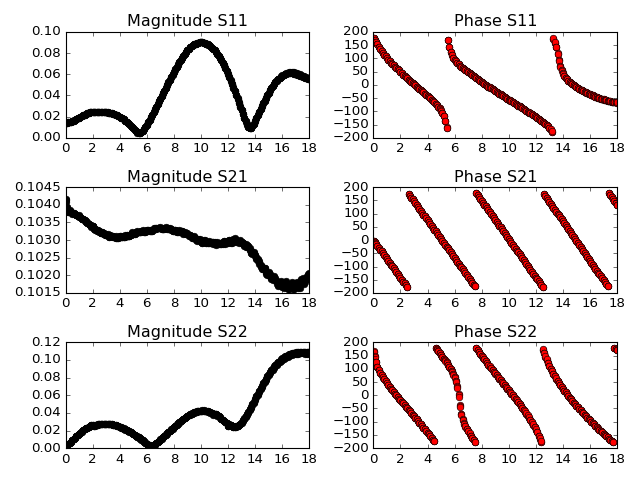

In [10]:
fig=table.show()

In [11]:
if table.metadata["Device_Id"]=='00080':
    table.metadata["Device_Id"]='80'
elif table.metadata["Device_Id"]=='02681':
    table.metadata["Device_Id"]='2681'
options={"Device_Id":table.metadata["Device_Id"], "System_Id":table.metadata["System_Id"],"Measurement_Timestamp":None,
                                      "Connector_Type_Measurement":None,
                                     "Measurement_Date":None,"Measurement_Time":None}
if re.search('2-port',table.metadata["Measurement_Type"],re.IGNORECASE) and not re.search('2-portNR',table.metadata["Measurement_Type"],re.IGNORECASE):
    history_key='2-port'
    options["column_names"]=['Frequency','magS11','argS11','magS21','argS21','magS22','argS22']
elif re.search('2-portNR',table.metadata["Measurement_Type"],re.IGNORECASE):
    history_key='2-portNR'
    options["column_names"]=['Frequency','magS11','argS11','magS12','argS12','magS21','argS21','magS22','argS22']
elif re.search('1-port',table.metadata["Measurement_Type"],re.IGNORECASE):
    history_key='1-port'
    if COMBINE_S11_S22:
        options["column_names"]=['Frequency','magS11','argS11']
    else:
        options["column_names"]=['Frequency','magS11','argS11','magS22','argS22']
elif re.search('Dry Cal|Thermistor|power',table.metadata["Measurement_Type"],re.IGNORECASE):
    history_key='power'
    options["column_names"]=['Frequency','magS11','argS11','Efficiency']
                    #print history[history_key][:5]
print history_key
mean_1=mean_from_history(history_dict[history_key].copy(),**options)
options["System_Id"]=None
mean_2=mean_from_history(history_dict[history_key + " results"].copy(),**options)
device_history=history_dict[history_key].copy()
device_history=device_history[device_history["Device_Id"]==table.metadata["Device_Id"]]
unique_dates=device_history["Measurement_Date"].unique().tolist()

2-port


In [124]:

test_columns_names=["magS11"]
uncertainty_test_column_names=['uMgS11']


<IPython.core.display.Javascript object>


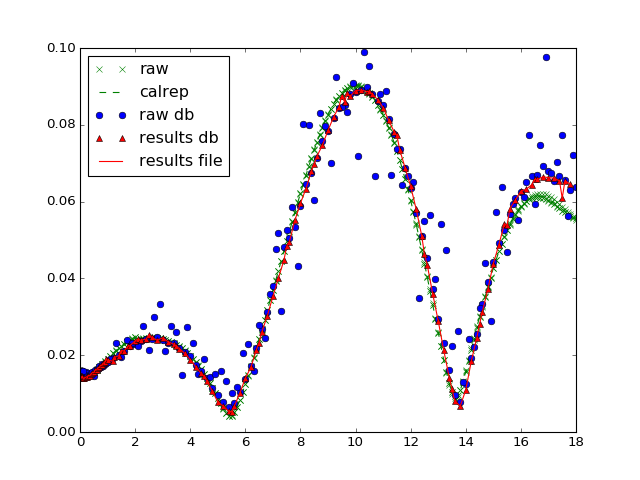

In [12]:
# now we need to plot a representive curve from each
plt.plot(table["Frequency"],table["magS11"],'gx',label="raw")
plt.plot(calrep_table["Frequency"],calrep_table["magS11"],'g--',label="calrep")
plt.plot(mean_1["Frequency"],mean_1["magS11"],'bo',label="raw db")
plt.plot(mean_2["Frequency"],mean_2["magS11"],'r^',label="results db")
plt.plot(res["Frequency"],res["magS11"],'r-',label="results file")
plt.legend(loc=0)

<IPython.core.display.Javascript object>


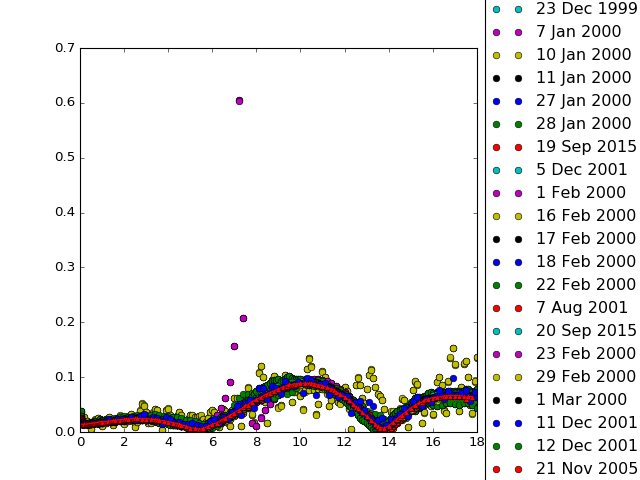

In [26]:
%matplotlib notebook
PARAMETER="magS11"
ERROR=PARAMETER.replace("mag","uMg").replace("arg","uAg")
offset=60
max_curves=50
number_lines=len(unique_dates)-1
fig, (ax0) = plt.subplots(nrows=1, sharex=True)
for date_index,date in enumerate(unique_dates[offset:offset+max_curves]):
    # this data frame is the thing that needs to be filtered 
    # do we need to calrep this data frame and then check it against another standard file?
    # so we need a seed (one file that is marked as good)
    data_frame=device_history[device_history["Measurement_Date"]==date]
    
    date_color=(1-float(date_index+1)/number_lines,0,float(date_index+1)/number_lines,.5)
    ax0.plot(data_frame["Frequency"],data_frame[PARAMETER],'o',label=date)
ax0.plot(table["Frequency"],table[PARAMETER],'gx',label="raw")
ax0.plot(calrep_table["Frequency"],calrep_table[PARAMETER],'g--',label="calrep")
ax0.plot(mean_1["Frequency"],mean_1[PARAMETER],'bo',label="raw db")
ax0.plot(mean_2["Frequency"],mean_2[PARAMETER],'r^',label="results db")
ax0.plot(res["Frequency"],res[PARAMETER],'r-',label="results file")
box = ax0.get_position()
ax0.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax0.legend(loc='center left', bbox_to_anchor=(1, 0.5))



<IPython.core.display.Javascript object>


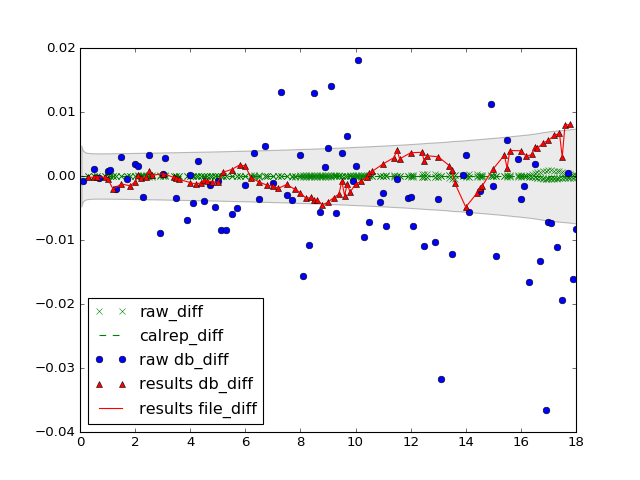

In [14]:
# now take the difference of each and plot it with a shaded region defined by the calrep errors
table_diff=frequency_model_difference(table,calrep_table)
calrep_table_diff=frequency_model_difference(calrep_table,calrep_table)
mean_1_diff=frequency_model_difference(calrep_table,mean_1)
mean_2_diff=frequency_model_difference(mean_2,calrep_table)
res_diff=frequency_model_difference(res,calrep_table)
plt.plot(table_diff["Frequency"],table_diff["magS11"],'gx',label="raw_diff")
plt.plot(calrep_table_diff["Frequency"],calrep_table_diff["magS11"],'g--',label="calrep_diff")
plt.plot(mean_1_diff["Frequency"],mean_1_diff["magS11"],'bo',label="raw db_diff")
plt.plot(mean_2_diff["Frequency"],mean_2_diff["magS11"],'r^',label="results db_diff")
plt.plot(res_diff["Frequency"],res_diff["magS11"],'r-',label="results file_diff")
plt.fill_between(calrep_table["Frequency"],-1*np.array(calrep_table["uMgS11"]),
                 calrep_table["uMgS11"],edgecolor=(0,.0,.0,.25), facecolor=(.25,.25,.25,.1),
                            linewidth=1)
plt.legend(loc=3)

<Code.DataHandlers.GeneralModels.AsciiDataTable instance at 0x000000001310F348>

<IPython.core.display.Javascript object>


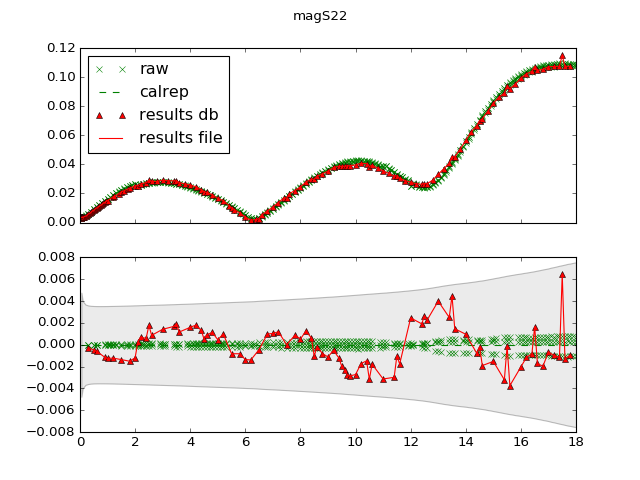

In [27]:
# now we can do both for S21 AND s22
# now we need to plot a representive curve from each
PARAMETER="magS22"
ERROR=PARAMETER.replace("mag","uMg").replace("arg","uAg")
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
ax0.plot(table["Frequency"],table[PARAMETER],'gx',label="raw")
ax0.plot(calrep_table["Frequency"],calrep_table[PARAMETER],'g--',label="calrep")
#ax0.plot(mean_1["Frequency"],mean_1[PARAMETER],'bo',label="raw db")
ax0.plot(mean_2["Frequency"],mean_2[PARAMETER],'r^',label="results db")
ax0.plot(res["Frequency"],res[PARAMETER],'r-',label="results file")
ax0.legend(loc=0)
ax1.plot(table_diff["Frequency"],table_diff[PARAMETER],'gx',label="raw_diff")
ax1.plot(calrep_table_diff["Frequency"],calrep_table_diff[PARAMETER],'g--',label="calrep_diff")
#ax1.plot(mean_1_diff["Frequency"],mean_1_diff[PARAMETER],'bo',label="raw db_diff")
ax1.plot(mean_2_diff["Frequency"],mean_2_diff[PARAMETER],'r^',label="results db_diff")
ax1.plot(res_diff["Frequency"],res_diff[PARAMETER],'r-',label="results file_diff")
ax1.fill_between(calrep_table["Frequency"],-1*np.array(calrep_table[ERROR]),
                 calrep_table[ERROR],edgecolor=(0,.0,.0,.25), facecolor=(.25,.25,.25,.1),
                            linewidth=1)
plt.suptitle(PARAMETER)
#ax1.legend(loc=3)

In [ ]:
def mean_from_history_outlier_rejected(history_frame,**options):
    """mean_from_history creates a mean_frame given a full history frame (pandas.DataFrame object),
    by setting options it selects column names
    to output and input values to filter on. Returns a pandas.DataFrame object with column names = column_names,
    and filtered by any of the following: "Device_Id","System_Id","Measurement_Timestamp",
    "Connector_Type_Measurement", "Measurement_Date" or "Measurement_Time"
    we need to excluded raw data sets that don't conform to selection criteria. We need a standard curve with uncertainty"""

    defaults={"Device_Id":None, "System_Id":None,"Measurement_Timestamp":None,
              "Connector_Type_Measurement":None,
             "Measurement_Date":None,"Measurement_Time":None,
              "column_names":['Frequency','magS11','argS11']}
    mean_options={}
    for key,value in defaults.iteritems():
        mean_options[key]=value
    for key,value in options.iteritems():
            mean_options[key]=value

    filters=["Device_Id","System_Id","Measurement_Timestamp","Connector_Type_Measurement",
             "Measurement_Date","Measurement_Time"]
    temp_frame=history_frame.copy()
    for index,filter_type in enumerate(filters):
        if mean_options[filter_type] is not None:
            temp_frame=temp_frame[temp_frame[filter_type]==mean_options[filter_type]]
#     temp_frame=temp_frame[temp_frame["Device_Id"]==mean_options["Device_Id"]]
#     temp_frame=temp_frame[temp_frame["System_Id"]==mean_options["System_Id"]]
    unique_frequency_list=temp_frame["Frequency"].unique()
    mean_array=[]
    for index,freq in enumerate(unique_frequency_list):
        row=[]
        for column in mean_options["column_names"]:
            values=np.mean(temp_frame[temp_frame["Frequency"]==unique_frequency_list[index]][column].as_matrix())
            mean_value=np.mean(values)
            row.append(mean_value)
        mean_array.append(row)
    mean_frame=pandas.DataFrame(mean_array,columns=mean_options["column_names"])
    return mean_frame

In [48]:
diff_adt=frequency_model_difference(res,calrep_table)

In [49]:
print diff_adt

Frequency,magS11,argS11,magS21,argS21,magS22,argS22
0.3,-0.00018,-1.79233333333,-4.62904479945e-05,0.04,-0.000256666666667,-6.90733333333
0.5,-0.000196666666667,-1.455,-3.98903801773e-05,0.029,-0.000503333333333,-6.25733333333
0.6,-0.00011,-1.05233333333,-8.9434055239e-05,0.012,-0.000593333333333,-6.47133333333
0.9,-0.00019,-0.647666666667,-0.000112232093535,0.023,-0.00115,-6.19433333333
1.0,-0.0004,-0.931333333333,-0.000136186433548,0.0103333333333,-0.00125333333333,-5.74166666667
1.2,-0.00203666666667,0.397666666667,-9.68846351996e-05,0.0226666666667,-0.00122666666667,-0.896
1.5,-0.00124,-2.04066666667,-0.000139068043783,0.00866666666666,-0.00136333333333,-4.216
1.8,-0.00151666666667,-2.50566666667,-8.29187001816e-05,-0.03,-0.00151,-2.197
2.0,-0.00096,-2.527,-0.000142108212006,0.0033333333333,-0.0012,-3.038
2.1,0.000136666666667,0.531,-0.000153370217912,-0.0326666666666,0.000266666666667,-4.28033333333
2.2,-0.000363333333333,-1.731,-4.69288330162e-05,-0.00466666666668,0.0007033333333

In [134]:
# now try to calculate the mean from the combined results
mean_1=mean_from_history(history_dict[return_history_key(table)],column_names=table.column_names)

['Frequency', 'Direction', 'Connect', 'magS11', 'argS11']

In [112]:
options={"Device_Id":table.metadata["Device_Id"],"System_Id":table.metadata["System_Id"]}
mean_frame=mean_from_history(history_dict[return_history_key(table)],column_names=table.column_names)

TwoPortRawModel


In [34]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


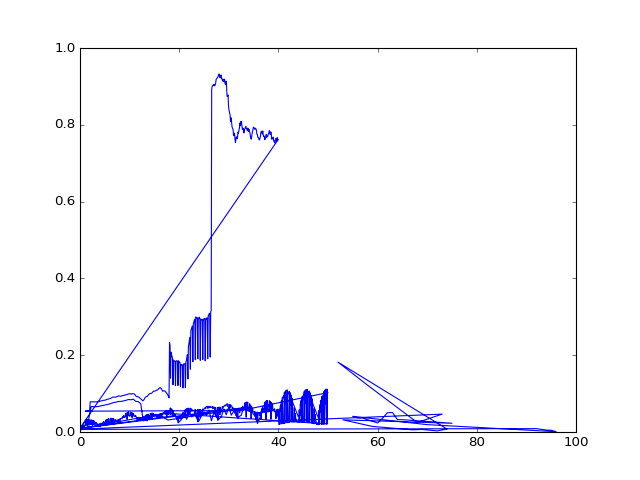

In [113]:
%matplotlib notebook
plt.plot(mean_frame["Frequency"],mean_frame["magS11"])

In [ ]:
plt.plot(mean_frame_2["Frequency"],mean_frame_2["magS11"])

In [25]:
one_port_history=history_dict[return_history_key(table)]

OnePortRawModel


In [135]:
options={"Device_Id":table.metadata["Device_Id"]}
mean_frame_2=mean_from_history(history_dict["1-port results"],
                               column_names=["Frequency","magS11","argS11"])

<IPython.core.display.Javascript object>


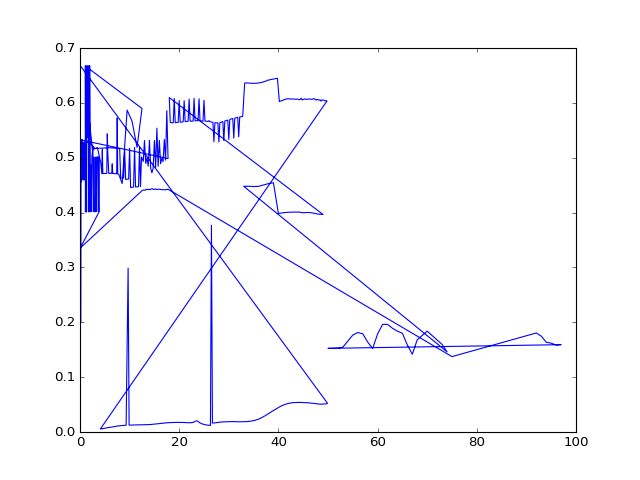

In [141]:
#mean_frame
plt.plot(mean_frame_2["Frequency"],mean_frame_2["magS11"])

In [82]:
history_dict["2-port results"].columns

Index([u'Device_Id', u'Frequency', u'Number_Measurements', u'magS11',
       u'argS11', u'magS21', u'argS21', u'magS22', u'argS22'],
      dtype='object')

In [30]:
out=one_port_history.rename(columns = {'mag':'magS11','arg':'argS11'})
out.to_csv(r"C:\Share\Converted_Check_Standard\Combined_One_Port_Check_Standard.csv",index=False)

In [29]:
out.columns

Index([u'Frequency', u'Direction', u'Connect', u'magS11', u'argS11',
       u'System_Id', u'System_Letter', u'Connector_Type_Calibration',
       u'Connector_Type_Measurement', u'Measurement_Type', u'Measurement_Date',
       u'Measurement_Time', u'Program_Used', u'Program_Revision', u'Operator',
       u'Calibration_Name', u'Calibration_Date', u'Port_Used',
       u'Number_Connects', u'Number_Repeats', u'Nbs', u'Number_Frequencies',
       u'Start_Frequency', u'Device_Description', u'Device_Id',
       u'Measurement_Timestamp'],
      dtype='object')

In [139]:
#diff=frequency_model_difference(table,mean_frame)
diff_2=frequency_model_difference(table,mean_frame_2)
diff_2.column_names=["Frequency","magS11","argS11"]

<IPython.core.display.Javascript object>


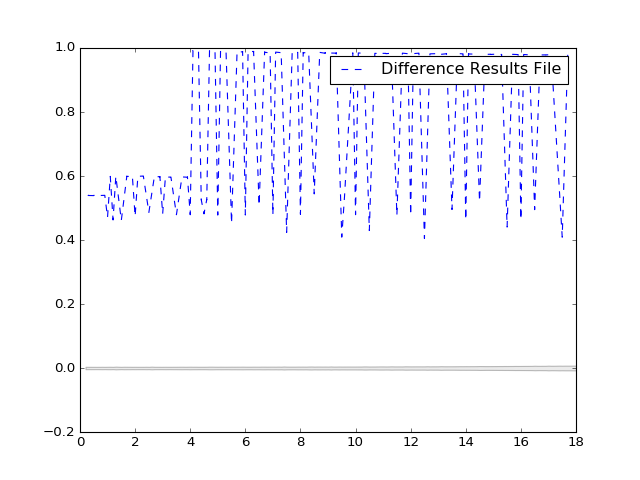

In [140]:

#plt.plot(diff["Frequency"],diff["magS11"],"rx",label="Difference Calculated Mean")
plt.plot(diff_2["Frequency"],diff_2["magS11"],"b--",label="Difference Results File")
plt.fill_between(calrep_table["Frequency"],-1*np.array(calrep_table["uMgS11"]),calrep_table["uMgS11"],edgecolor=(0,.0,.0,.25), facecolor=(.25,.25,.25,.1),
                            linewidth=1)
plt.legend()

In [138]:
print diff_2

Frequency,x1,x2
0.3,0.539245,-57.63434375
0.3,0.539565,-57.62934375
0.3,0.539115,-57.67234375
0.5,0.538923125,-61.157125
0.5,0.538743125,-61.183125
0.5,0.539493125,-61.173125
0.7,0.5395521875,-62.92665625
0.7,0.5387321875,-62.92665625
0.7,0.5389321875,-62.85665625
0.9,0.5396325,-64.9733125
0.9,0.5391125,-64.7863125
0.9,0.5390725,-64.8603125
1.0,0.472159534884,-71.2792790698
1.0,0.470679534884,-71.2582790698
1.0,0.471809534884,-71.2702790698
1.1,0.598132,-69.7184
1.1,0.598792,-69.9284
1.1,0.597072,-69.8704
1.2,0.4629975,-67.4757142857
1.2,0.4625475,-67.6087142857
1.2,0.4629375,-67.6357142857
1.3,0.597112,-76.129
1.3,0.597162,-76.093
1.3,0.599492,-76.095
1.5,0.461313809524,-70.9501428571
1.5,0.461173809524,-70.8801428571
1.5,0.461763809524,-71.0271428571
1.7,0.599974,-89.0096
1.7,0.599524,-88.8986
1.7,0.598474,-89.0496
1.9,0.59939,-93.5494
1.9,0.59982,-93.5584
1.9,0.60015,-93.5044
2.0,0.475008139535,-114.812162791
2.0,0.473868139535,-114.840162791
2.0,0.473958139535,-114.866162791
2.1,0.

<IPython.core.display.Javascript object>


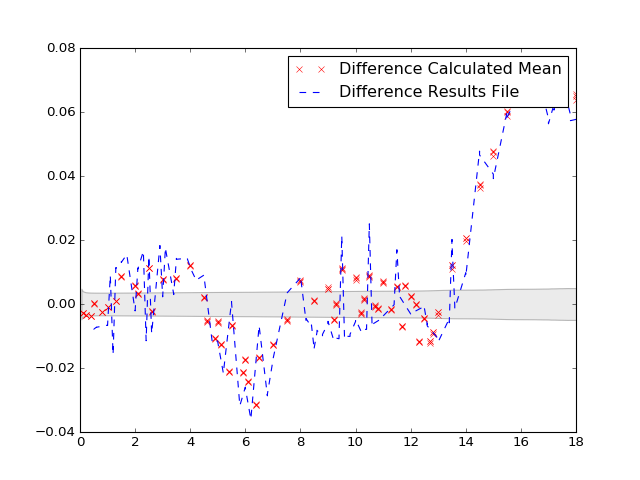

In [95]:
plt.plot(diff["Frequency"],diff["magS22"],"rx",label="Difference Calculated Mean")
plt.plot(diff_2["Frequency"],diff_2["magS22"],"b--",label="Difference Results File")
plt.fill_between(calrep_table["Frequency"],-1*np.array(calrep_table["uMgS22"]),calrep_table["uMgS22"],edgecolor=(0,.0,.0,.25), facecolor=(.25,.25,.25,.1),
                            linewidth=1)
plt.legend()

<IPython.core.display.Javascript object>


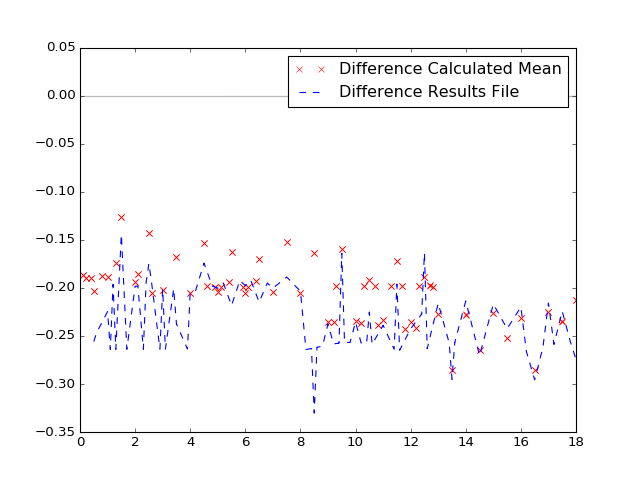

In [96]:
plt.plot(diff["Frequency"],diff["magS21"],"rx",label="Difference Calculated Mean")
plt.plot(diff_2["Frequency"],diff_2["magS21"],"b--",label="Difference Results File")
plt.fill_between(calrep_table["Frequency"],-1*np.array(calrep_table["uMgS21"]),calrep_table["uMgS21"],edgecolor=(0,.0,.0,.25), facecolor=(.25,.25,.25,.1),
                            linewidth=1)
plt.legend()

<IPython.core.display.Javascript object>


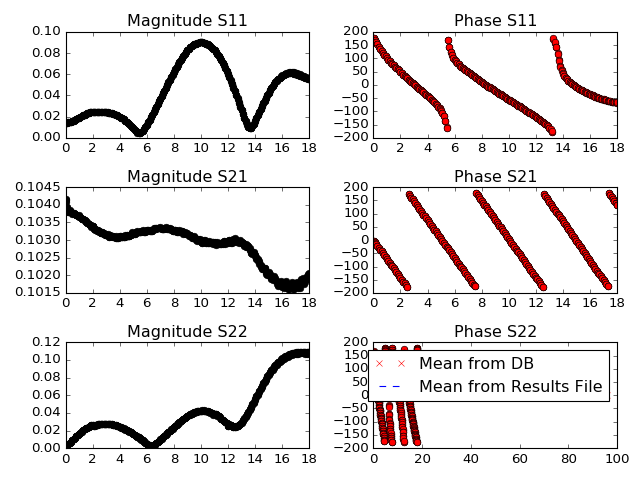

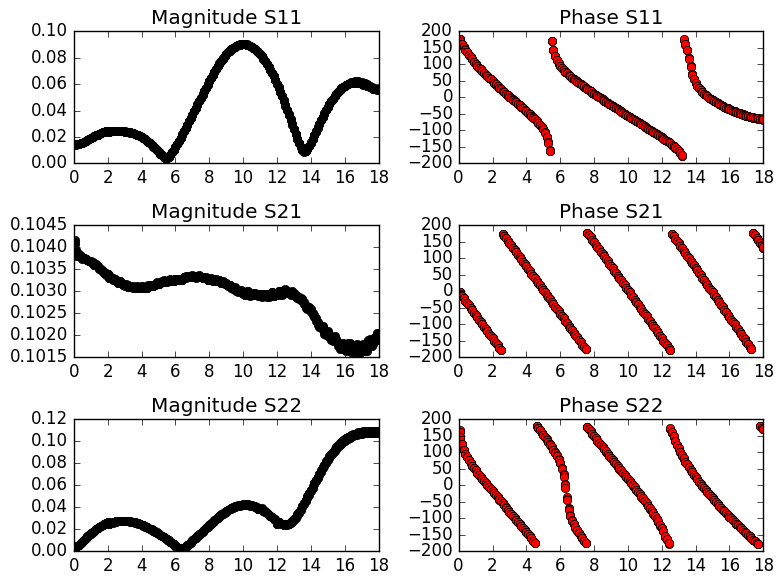

In [97]:
table.show()

<IPython.core.display.Javascript object>


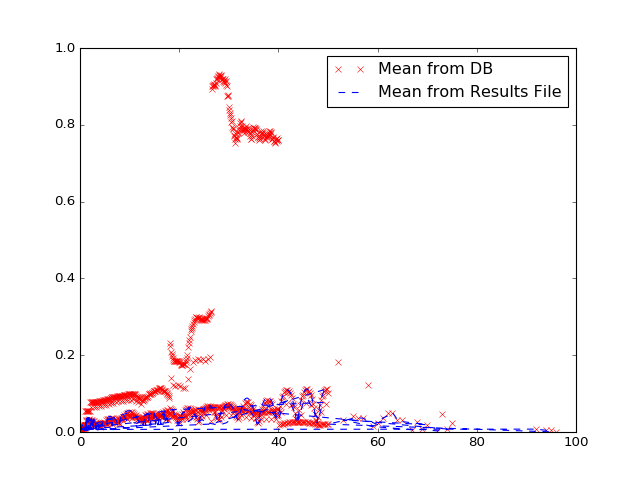

In [100]:
plt.plot(mean_frame["Frequency"],mean_frame["magS11"],"rx",label="Mean from DB")
plt.plot(mean_frame_2["Frequency"],mean_frame_2["magS11"],"b--",label="Mean from Results File")
plt.legend()

In [101]:
mean_frame_2

,Frequency,magS11,argS11,magS21,argS21,magS22,argS22
0,0.010,0.006818,-27.743950,0.377586,-0.953700,0.005963,12.436600
1,0.020,0.006508,-11.749421,0.359256,-1.696632,0.004999,14.668000
2,0.030,0.006583,29.711789,0.359229,-2.554789,0.005077,22.650000
3,0.040,0.006595,67.797632,0.359210,-3.376474,0.005077,23.504211
4,0.050,0.006606,50.133480,0.390416,-3.868720,0.006291,39.139960
5,0.060,0.006657,65.622895,0.359182,-5.015053,0.005091,41.125368
6,0.070,0.006710,67.691737,0.359166,-5.857000,0.005144,43.574000
7,0.080,0.006718,67.891421,0.359149,-6.689579,0.005104,44.641000
8,0.090,0.006752,66.480737,0.359124,-7.535368,0.005153,42.297474
9,0.100,0.007820,55.924241,0.344179,-7.347034,0.007230,36.957586


In [85]:
mean_1.columns.tolist()

'magS11'

In [86]:
adt=DataFrame_to_AsciiDataTable(mean_1)

In [88]:
adt.column_names==mean_1.columns.tolist()

True

In [100]:
diff_adt=frequency_model_difference(calrep_table,adt)
diff_adt_2=frequency_model_difference(adt,calrep_table)

In [93]:
diff_adt.column_names

['Frequency', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6']

In [92]:
diff_adt=frequency_model_difference(adt,calrep_table)

In [94]:
adt.column_names

['Frequency', 'magS11', 'argS11', 'magS21', 'argS21', 'magS22', 'argS22']

In [95]:
calrep_table.column_names

['Frequency',
 'magS11',
 'uMbS11',
 'uMaS11',
 'uMdS11',
 'uMgS11',
 'argS11',
 'uAbS11',
 'uAaS11',
 'uAdS11',
 'uAgS11',
 'magS21',
 'uMbS21',
 'uMaS21',
 'uMdS21',
 'uMgS21',
 'argS21',
 'uAbS21',
 'uAaS21',
 'uAdS21',
 'uAgS21',
 'magS22',
 'uMbS22',
 'uMaS22',
 'uMdS22',
 'uMgS22',
 'argS22',
 'uAbS22',
 'uAaS22',
 'uAdS22',
 'uAgS22']

In [97]:
adt.column_names[0]==calrep_table.column_names[0]

True

In [98]:
adt.column_names[1]==calrep_table.column_names[1]

True

In [104]:
print str(diff_adt).splitlines()[0:100]


['Frequency,magS11,argS11,magS21,argS21,magS22,argS22', '0.1,-0.000785238095238,-0.282333333333,2.27777449556e-05,0.0100714285714,-0.00033619047619,-5.00252380952', '0.5,0.00114563218391,4.87715517241,0.00107447581657,-16.5619551724,-0.00415390804598,-3.71483908046', '0.7,-0.000268205128205,9.41211666667,0.00124205272306,-13.4225282051,-0.000793076923077,10.9243102564', '1.0,0.000797025316456,1.37796054852,0.000300858271825,-1.34397447257,0.00195156118143,1.80632742616', '1.1,0.000905,92.6253333333,0.00425191634629,-79.0658333333,-0.005575,2.489', '1.3,-0.00197166666667,-20.8764166667,0.00457108307662,-16.94425,-0.01248,19.4185833333', '1.5,0.00300285714286,4.79538095238,0.0029173951435,11.9806190476,-0.00183666666667,-29.8454285714', '1.7,-0.00047,44.2778333333,0.00425917253389,-97.0648333333,0.0010075,36.51625', '2.0,0.00184518987342,0.464720253165,0.000377400635817,-6.14756814346,0.00216740506329,4.78124620253', '2.1,0.00152083333333,-37.94975,0.00550518549,2.70391666667,-0.00155666

In [105]:
print str(diff_adt_2).splitlines()[0:100]


['Frequency,x1,x2,x3,x4,x5,x6', '0.5,-0.00114563218391,-4.87715517241,-0.00107447581657,16.5619551724,0.00415390804598,3.71483908046', '0.7,0.000268205128205,-9.41211666667,-0.00124205272306,13.4225282051,0.000793076923077,-10.9243102564', '1.0,-0.000797025316456,-1.37796054852,-0.000300858271825,1.34397447257,-0.00195156118143,-1.80632742616', '2.0,-0.00184518987342,-0.464720253165,-0.000377400635817,6.14756814346,-0.00216740506329,-4.78124620253', '3.0,-0.000270210970464,0.232824894515,-0.000349054664874,-6.10904957806,0.000646286919831,0.224679746835', '4.0,-0.000212130801688,2.98965759494,-0.000426282692389,2.07394683544,0.00109130801688,13.4842898734', '5.0,0.000797320675105,-1.57122257384,-0.000499380811805,0.0599542194093,0.000871329113924,0.428337763713', '6.0,0.00133938818565,7.32211624473,-0.000557446987808,1.51242531646,-0.0010508649789,13.5191177215', '7.0,0.00107934599156,3.93749725738,-0.000540656379163,9.86358691983,0.00241879746835,7.02866751055', '8.0,-0.00335886075949

In [106]:
set_1=set(calrep_table.column_names)
set_2=set(adt.column_names)

In [107]:
set_1.intersection(set_2)

{'Frequency', 'argS11', 'argS21', 'argS22', 'magS11', 'magS21', 'magS22'}

In [108]:
set_2.intersection(set_1)

{'Frequency', 'argS11', 'argS21', 'argS22', 'magS11', 'magS21', 'magS22'}

In [116]:
list_1=list(set_1.intersection(set_2))
list_2=list(set_2.intersection(set_1))

In [117]:
adt.column_names[1] in list_1

True

In [118]:
adt.column_names[1] in list_2

True

In [119]:
calrep_table.column_names[1] in list_1


True

In [120]:
calrep_table.column_names[1] in list_2

True

In [31]:
res_diff.get_options()

inline_comments = None
data_begin_line = 1
column_names_begin_line = 0
footer_line_types = None
general_descriptor = Table
header_end_token = None
header_end_line = None
column_names_end_line = 1
data_table_element_separator = 

escape_character = None
data = None
inline_comment_begin = None
column_descriptions = None
inline_comment_end = None
data_begin_token = None
comment_end = None
header_begin_line = None
row_end_token = None
column_names_end_token = None
block_comment_begin = None
header_begin_token = None
metadata = None
specific_descriptor = Data
empty_value = None
column_names_begin_token = None
footer_end_token = None
interpolate = False
footer_begin_token = None
column_names = None
metadata_key_value_delimiter = None
column_types = None
comment_begin = None
treat_header_as_comment = None
column_units = None
column_names_delimiter = ,
treat_footer_as_comment = None
extension = txt
header = None
average = True
footer = None
data_end_line = None
block_comment_end = None
footer_